<a href="https://colab.research.google.com/github/BalramAgnihotri123/Machine-Learning-And-Deep-Learning-HandsOn/blob/main/product_price_forest_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Importing relevent libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn import preprocessing
import os
import warnings 
warnings.filterwarnings("ignore")

In [2]:
cwd = os.getcwd()

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',20)

## 2.Preprocessing of the data for model training

In [5]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df = df_train.append(df_test)
df.drop('User_ID',axis = 1 , inplace = True)

df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


### 2.1 Filling Null values 

In [6]:
def filling_nulls(df:pd.DataFrame,
                  columns_to_fill:list()):
    """
    returns a dataframe ith nul values filled with mean,median or mode
    """
    for column in columns_to_fill:
        df[column].fillna(df[column].mode()[0],inplace=True)
    return df

df = filling_nulls(df,['Product_Category_2','Product_Category_3'])

### 2.2Converting Categorical Data to numerical

In [7]:
def Categorical_to_numerical(df:pd.DataFrame,
                             columns_to_fill:list()) -> pd.DataFrame:
    """
    returns a dataframe with categorical features converted to numerical  
    
    """
    # can also use dummies for features that are not ordinal like age group and City Category
    from sklearn.preprocessing import LabelEncoder
    
    le = LabelEncoder()
    for column in columns_to_fill:
        encoded_column = le.fit_transform(df[column])
        df[column] = encoded_column
    return df

df = Categorical_to_numerical(df,['Age','Gender','Occupation','Stay_In_Current_City_Years','City_Category']) 
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,0,2,0,3,8.0,16.0,8370.0
1,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,0,2,0,12,8.0,16.0,1422.0
3,P00085442,0,0,10,0,2,0,12,14.0,16.0,1057.0
4,P00285442,1,6,16,2,4,0,8,8.0,16.0,7969.0


In [8]:
df = df.drop(["Product_ID"],axis =1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 65.8 MB


In [10]:
df_test = df[df['Purchase'].isnull()]
df_train = df[~df['Purchase'].isnull()]

In [11]:
x = df_train.drop('Purchase',axis = 1)
y = df_train['Purchase']

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x ,y ,test_size = 0.2,random_state = 42)

In [13]:
df_train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,8.0,16.0,8370.0
1,0,0,10,0,2,0,1,6.0,14.0,15200.0
2,0,0,10,0,2,0,12,8.0,16.0,1422.0
3,0,0,10,0,2,0,12,14.0,16.0,1057.0
4,1,6,16,2,4,0,8,8.0,16.0,7969.0


## 3.Creating Models

### 3.1 Linear Model

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
reg = LinearRegression()

In [43]:
reg.fit(x_train,y_train)

LinearRegression()

In [44]:
reg.coef_

array([ 523.21783639,  120.64684223,    6.39355074,  336.67173278,
          8.36538798,  -52.35543446, -403.18211099,   -1.72114042,
       -155.25713535])

In [45]:
result = reg.predict(x_test)

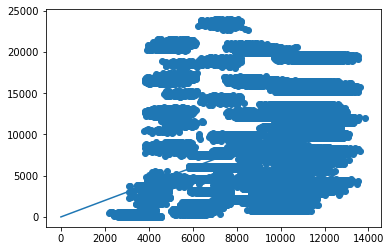

In [46]:
a = np.arange(1,20000,10000)

plt.scatter(result,y_test)
plt.plot(a,a)
plt.show()

In [47]:
reg.score(x_train,y_train),reg.score(x_test,y_test)

(0.13116158704004344, 0.13009752050368628)

#### Checking Multicollinearity

In [14]:
df_temp = df_train.drop("Product_Category_3",axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_temp.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_temp.values, i)
                          for i in range(len(df_temp.columns))]
print(vif_data)

                      feature       VIF
0                      Gender  3.656127
1                         Age  4.652960
2                  Occupation  2.520777
3               City_Category  2.801816
4  Stay_In_Current_City_Years  2.816583
5              Marital_Status  1.867815
6          Product_Category_1  3.138682
7          Product_Category_2  5.146485
8                    Purchase  3.813488


In [15]:
df_train = df_train.drop("Product_Category_3",axis=1)

x = df_train.drop('Purchase',axis = 1)
y = df_train['Purchase']

### 3.2 Random Forest Regresssor Model

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x ,y ,test_size = 0.2,random_state = 42)

In [17]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(max_depth=15)

In [18]:
clf.fit(x_train,y_train)

RandomForestRegressor(max_depth=15)

In [19]:
print(f'training accuracy:- {clf.score(x_train,y_train)}\ntesting accuracy:- {clf.score(x_test,y_test)}')

training accuracy:- 0.6928965374582778
testing accuracy:- 0.6527984380227576


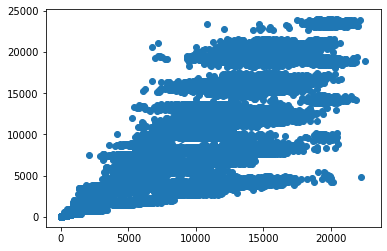

In [20]:
a = np.arange(1,20000,10000)
result = clf.predict(x_test)
plt.scatter(result,y_test)
plt.plot(a,a)
plt.show()